In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Prepare the Data

In [2]:
# Data loading
file_path = ("Resources/Myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Drop MYOPIC column to avoid bias
df_myopia = df.drop(columns = ["MYOPIC"])
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Find null values
for column in df_myopia.columns:
    print(f"Column {column} has {df_myopia[column].isnull().sum()} null values.")

Column AGE has 0 null values.
Column SPHEQ has 0 null values.
Column AL has 0 null values.
Column ACD has 0 null values.
Column LT has 0 null values.
Column VCD has 0 null values.
Column SPORTHR has 0 null values.
Column READHR has 0 null values.
Column COMPHR has 0 null values.
Column STUDYHR has 0 null values.
Column TVHR has 0 null values.
Column DIOPTERHR has 0 null values.
Column MOMMY has 0 null values.
Column DADMY has 0 null values.


In [5]:
# Find duplicate entries
print(f"Duplicate entries: {df_myopia.duplicated().sum()}")

Duplicate entries: 0


In [42]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia)
DataFrameX = pd.DataFrame(scaled_data, columns = df_myopia.columns)
DataFrameX.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


## Part 2: Apply Dimensionality Reduction

In [7]:
# Initialize PCA model
pca = PCA(n_components = 0.9)

# Get two principal components for the data
myopia_pca = pca.fit_transform(scaled_data)

In [8]:
# Check dimensions
myopia_pca.shape

(618, 10)

In [10]:
# Run t-SNE
tsne = TSNE(learning_rate = 250)
myopia_tsne = tsne.fit_transform(myopia_pca)

/Users/jonkwiatkowski/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [11]:
# Ceck dimensions
myopia_tsne.shape

(618, 2)

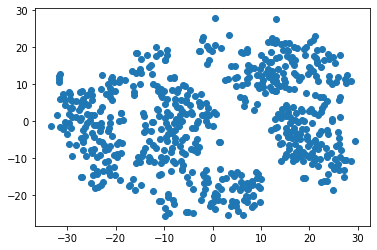

In [12]:
plt.scatter(myopia_tsne[:, 0], myopia_tsne[:, 1])
plt.show()

There does seem to be some clusters visible. I can see anywhere between two and five clusters. But most prominetly, two large clusters: one being more towards the bottom left and the other more towards the top right of the plot.

## Part 3: Perform a Cluster Analysis with K-means

In [21]:
inertia = []
k = list(range(1, 11))

# Calculate the intertia for the range of k values
for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(myopia_tsne)
    inertia.append(km.inertia_)
    
# Create the Elbow Curve data
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,273860.437500
1,2,133370.281250
2,3,87720.562500
3,4,63363.796875
4,5,45379.820312


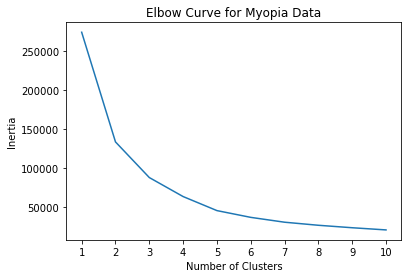

In [22]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Myopia Data")
plt.show()

In [29]:
tsne_df = pd.DataFrame(myopia_tsne, columns = ["Principal Component 1", "Principal Component 2"])
tsne_df.head()

,Principal Component 1,Principal Component 2
0,-15.839892,12.967317
1,-8.540398,-2.824404
2,21.982796,-3.489117
3,2.528787,11.215307
4,-21.680622,-7.716294


In [19]:
def get_clusters(k, data):
    
    # Initialize the K-Means model
    model = KMeans(n_clusters = k, random_state = 0)
    
    # Train the model
    model.fit(data)
    
    # Predict Clusters
    predictions = model.predict(data)
    
    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_
    
    return data

In [38]:
get_clusters(3, tsne_df)

,Principal Component 1,Principal Component 2,class
0,-15.839892,12.967317,0
1,-8.540398,-2.824404,0
2,21.982796,-3.489117,1
3,2.528787,11.215307,2
4,-21.680622,-7.716294,0
...,...,...,...
613,-19.277525,0.042963,0
614,-8.441369,-3.307600,0
615,-14.170705,1.222095,0
616,17.198788,2.140924,2


In [36]:
def show_clusters(df):
    plt.scatter(df["Principal Component 1"], df["Principal Component 2"], c = df["class"])
    plt.xlabel(["Pricipal Component 1"])
    plt.ylabel(["Principal Component 2"])
    plt.title("Myopia Clusters")
    plt.show()

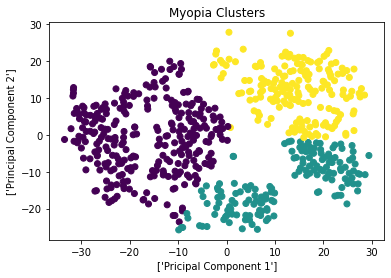

In [39]:
show_clusters(tsne_df)

In [40]:
get_clusters(2, tsne_df)

,Principal Component 1,Principal Component 2,class
0,-15.839892,12.967317,1
1,-8.540398,-2.824404,1
2,21.982796,-3.489117,0
3,2.528787,11.215307,0
4,-21.680622,-7.716294,1
...,...,...,...
613,-19.277525,0.042963,1
614,-8.441369,-3.307600,1
615,-14.170705,1.222095,1
616,17.198788,2.140924,0


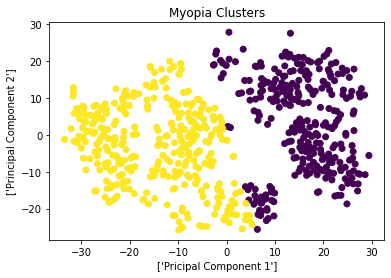

In [41]:
show_clusters (tsne_df)

## Analysis

The t-SNE reduction did seem to provide between two and five clusters. According to our elbow curve above, the optimal number of clusters seems to be 2 or 3. For $k=2$, the clusters seem a bit more prominent to me as those were the clusters I observed in the beginning. However, the elbow curve suggests that 3 clusters may be even better. Both results are plotted above.